# Winter Weather
This notebook calculates the urban risk index for the winter weather (WIW)
hazard.  The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The WIW hazard expected loss (ESL) includes consequences for the following receptors and marginal losses.
 * People / excess deaths
 * People / injuries
 * Roads / snow removal costs

#### 1a. People / excess deaths
The average annual cold stress death count across NYC was obtained from the NYC Environment & Health Data Portal and downscaled to the census tract level by population.  

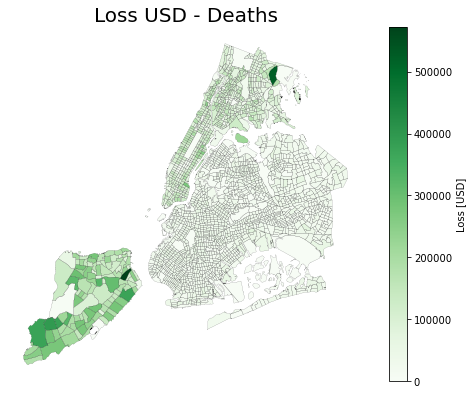

In [3]:
from MISC import params_1 as params
from MISC import utils_1 as utils
from MISC import plotting_1 as plotting
from CLASSES import class_EL_SV_CR_1 as URI
import matplotlib.pyplot as plt
import geopandas as gpd
import os
utils.set_home()
hazard_name = "WIW"


#create ESL class and add loss
path_loss =   params.PATHNAMES.at['ESL_WIW_loss_deaths', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL = URI.ESL(hazard_name = hazard_name)
ESL.add_consequence("Deaths", "People", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Deaths"]["map_tract"], 'Loss USD - Deaths')

#### 1b. People / Injuries
The average annual cold stress injury count across NYC was obtained from the NYC Environment & Health Data Portal and downscaled to the census tract level by population.  

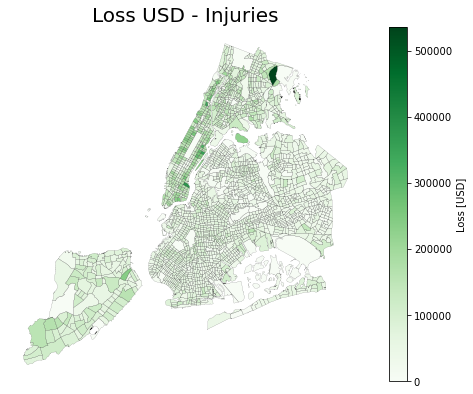

In [4]:
#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_WIW_loss_injury', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL.add_consequence("Injuries", "People", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Injuries"]["map_tract"], 'Loss USD - Injuries')

#### 1c. Roads / Snow Removal Costs
The average city expenditure on snow removal was provided by NYCEM.  The expenses were distributed to census tracts in proportion to the total surface area of road.  The area of road was obtained from a NYC land use map. 

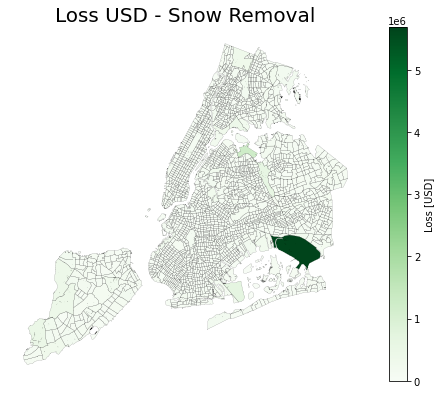

In [5]:
#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_WIW_loss_snow', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL.add_consequence("Snow", "Roads", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Snow"]["map_tract"], 'Loss USD - Snow Removal')


#### 1d. Expected Loss Total
The total expected losses are the sum of losses from each individual consequence.  

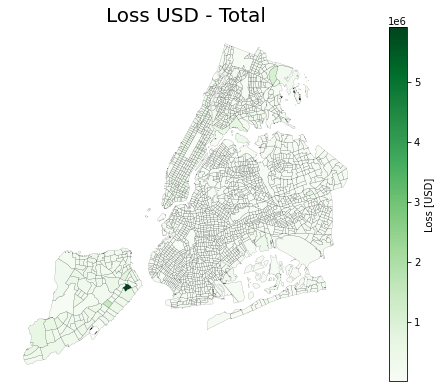

In [6]:
#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\ESL\ESL_{}_tract.shp'.format(hazard_name, hazard_name)
ESL.ESL_map.to_file(path_save)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.ESL_map, 'Loss USD - Total')


## 2. Social Vulnerability Score
The Social Vulnerability is based on the CDC social vulnerability index.  

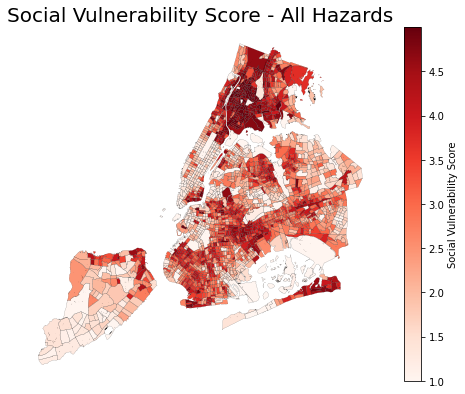

In [7]:
path_SOV = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\SOV\SOV_tract.shp'
gdf_SOV = gpd.read_file(path_SOV)
SOV = URI.SOV(hazard_name = hazard_name, map_tract = gdf_SOV)

#plot
plotting.plot_SOV_nb(SOV.SOV_map)

## 3. Resilience Capacity Score
The Resilience Capacity is the sum of four scores:
- Community capital
- Mitigation Landscape
- Response Capacity
- Recovery Resources


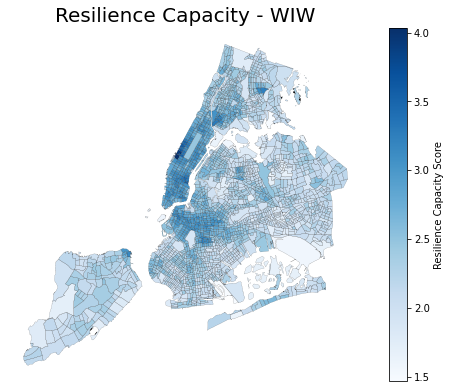

In [8]:
path_RCA = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\RCA\RCA_{}_tract.shp'.format(hazard_name)
gdf_RCA = gpd.read_file(path_RCA)
RCA = URI.RCA(hazard_name=hazard_name, map_tract=gdf_RCA)
#
plotting.plot_RCA_nb('WIW', RCA.RCA_map)

## 4. Calculate URI Score
The URI equation is URI = ESL * SOV / RCA.  The result is clustered into a score of 1 (low) to 5 (high).

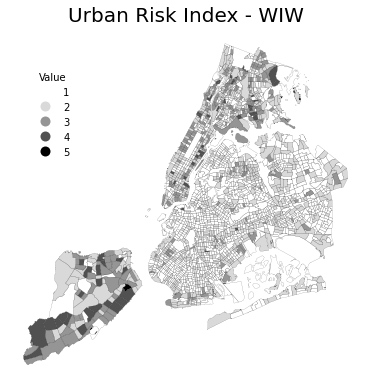

In [9]:
URI_HAZ = URI.URI(hazard_name=hazard_name, ESL=ESL, SOV=SOV, RCA=RCA)
URI_HAZ.calc_URI()

#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\URI\URI_{}_tract.shp'.format(hazard_name, hazard_name)
URI_HAZ.URI_map.to_file(path_save)
URI_HAZ.save_URI_FULL()

plotting.plot_URI_nb(hazard_name, URI_HAZ.URI_map)





